# Ensemble Learning

## Max Voting, Averaging, Weighted Average  (Classification)

### (Trains multiple models at the same time and Selects the accuracy based on the Mode value)

In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons

In [11]:
xx , yy = make_moons(n_samples=800,noise=0.15)

In [13]:
df = pd.DataFrame(xx,columns=["x1","x2"])
df["y0"] = yy

In [15]:
df.head()

,x1,x2,y0
0,0.953965,0.290708,0
1,1.829648,0.154670,1
2,0.192227,0.020096,1
3,-0.789967,0.418442,0
4,0.716597,-0.905723,1


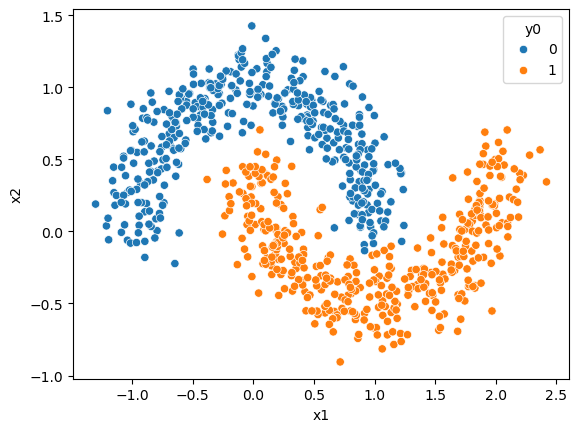

In [21]:
sns.scatterplot(x = "x1",y = "x2" ,data = df,hue = "y0")
plt.show()

In [23]:
x = df.iloc[:,:-1]
y = df["y0"]

In [25]:
from sklearn.model_selection import train_test_split

In [27]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state=42,test_size=0.2)

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [33]:
dt = DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
dt.score(xtrain,ytrain)*100 , dt.score(xtest,ytest)*100

(100.0, 96.875)

In [35]:
svc = SVC()
svc.fit(xtrain,ytrain)
svc.score(xtrain,ytrain)*100 , svc.score(xtest,ytest)*100

(99.53125, 98.125)

In [37]:
gc = GaussianNB()
gc.fit(xtrain,ytrain)
gc.score(xtrain,ytrain)*100 , gc.score(xtest,ytest)*100

(87.8125, 85.0)

In [39]:
knc = KNeighborsClassifier()
knc.fit(xtrain,ytrain)
knc.score(xtrain,ytrain)*100 , knc.score(xtest,ytest)*100

(99.6875, 98.75)

In [42]:
from sklearn.ensemble import VotingClassifier

In [44]:
list = [("dt1",DecisionTreeClassifier()),("svc1",SVC()),("gc1",GaussianNB()),("knc1",KNeighborsClassifier())]

In [46]:
vc = VotingClassifier(list)    # weights=None , you can change the weight values for better accuracy
# estimators : Should be given in the form of a list of tuples
vc.fit(xtrain,ytrain)

VotingClassifier(estimators=[('dt1', DecisionTreeClassifier()), ('svc1', SVC()),
                             ('gc1', GaussianNB()),
                             ('knc1', KNeighborsClassifier())])

In [48]:
vc.score(xtrain,ytrain)*100 , vc.score(xtest,ytest)*100

(99.6875, 97.5)

### Now lets see how the voting Classifier workes

In [57]:
work = {"dt":dt.predict(xtest),"svc":svc.predict(xtest),"gnb":gc.predict(xtest),"knc":knc.predict(xtest),"vc":vc.predict(xtest)}

### Here the vc values are taken by the mode of the all models 

In [59]:
pd.DataFrame(work)

,dt,svc,gnb,knc,vc
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,1,1,1,1,1
4,0,0,0,0,0
...,...,...,...,...,...
155,0,0,0,0,0
156,0,0,0,0,0
157,0,0,0,0,0
158,0,0,0,0,0


# Max Voting, Averaging, Weighted Average (Regression)

### (Trains multiple models at the same time and gives the avg of all the models)

In [70]:
data = pd.read_csv("placement1.csv")
data.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


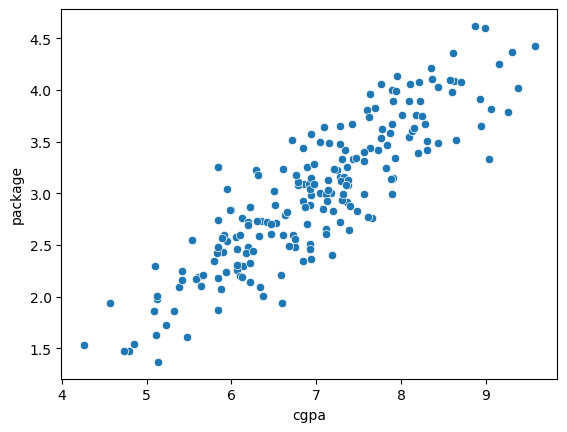

In [74]:
sns.scatterplot(x="cgpa",y = "package",data = data)
plt.show()

In [76]:
x = data.iloc[:,:-1]
y = data["package"]

In [78]:
from sklearn.model_selection import train_test_split

In [80]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [96]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [98]:
lr = LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)*100 , lr.score(x_test,y_test)*100

(77.58339025733345, 77.30984312051673)

In [100]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dtr.score(x_train,y_train)*100 , dtr.score(x_test,y_test)*100

(95.1559200955432, 52.19733481708333)

In [102]:
svr = SVR()
svr.fit(x_train,y_train)
svr.score(x_train,y_train)*100 , svr.score(x_test,y_test)*100

(78.16909319813372, 75.94945442913415)

In [104]:
from sklearn.ensemble import VotingRegressor

In [106]:
li = [("lr1",LinearRegression()),("dtr1",DecisionTreeRegressor()),("svr1",SVR())]

In [108]:
vr = VotingRegressor(li)
vr.fit(x_train,y_train)

VotingRegressor(estimators=[('lr1', LinearRegression()),
                            ('dtr1', DecisionTreeRegressor()),
                            ('svr1', SVR())])

In [110]:
vr.score(x_train,y_train)*100 , vr.score(x_test,y_test)*100

(87.56852979319457, 75.16568331690884)

### It is not a good accuracy but u can change it by using Hyperparameter tuning in the Models or by changing the weight of the Voting or by changing the Random_state of the split

In [114]:
avg = {"lr":lr.predict(x_test),"dtr":dtr.predict(x_test),"svr":svr.predict(x_test),"vr":vr.predict(x_test)}

In [118]:
pd.DataFrame(avg).head()

,lr,dtr,svr,vr
0,2.780313,2.9200,2.745462,2.815259
1,3.136352,3.2525,3.111375,3.166742
2,3.199521,2.9200,3.186923,3.102148
3,2.389819,2.5400,2.407183,2.445667
4,3.526847,3.9900,3.603909,3.706919


#### Same as the avg value of the first vr

In [120]:
(2.780313+2.9200+2.745462)/3

2.815258333333333

# Bagging (Bagging Meta-Estimator and Random Forest) (Classification)

### Divides the data into multiple subsets and make multiple Models and selects the mode of the models for accuracy in classsification

In [128]:
nx , ny = make_moons(n_samples=900,noise=0.21)

In [130]:
ds = pd.DataFrame(nx,columns=["d1","d2"])
ds["new_y"] = ny

In [132]:
ds.head()

,d1,d2,new_y
0,-0.344108,0.724369,0
1,2.098306,-0.044140,1
2,0.479768,-0.504453,1
3,0.731277,0.540859,0
4,0.704780,1.075508,0


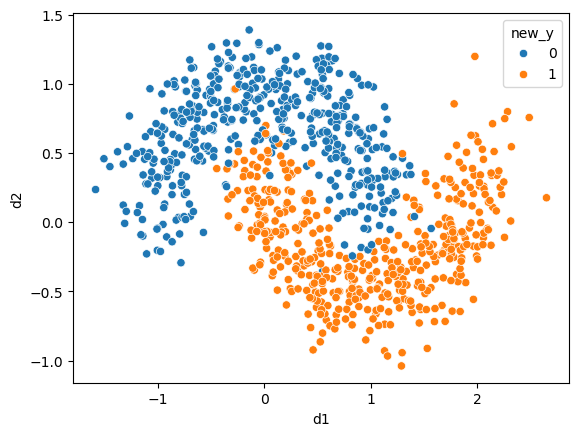

In [141]:
sns.scatterplot(x = "d1",y ="d2",data = ds,hue = "new_y")
plt.show()

In [136]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [143]:
x = ds.iloc[:,:-1]
y = ds["new_y"]

In [147]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state=42,test_size=0.2)

### Meta Estimator (Classification)

### Can give any Estimator Model based on the results

In [151]:
bgc = BaggingClassifier(estimator=SVC(),n_estimators=25)
bgc.fit(xtrain,ytrain)

BaggingClassifier(estimator=SVC(), n_estimators=25)

In [153]:
bgc.score(xtrain,ytrain)*100 , bgc.score(xtest,ytest)*100

(97.63888888888889, 95.55555555555556)

## Random Forest (Classification)

### contains only default Decision Tree cannot change Estimator 

In [160]:
rfc = RandomForestClassifier(n_estimators=25)
rfc.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=25)

In [162]:
rfc.score(xtrain,ytrain)*100 , rfc.score(xtest,ytest)*100

(99.72222222222223, 95.55555555555556)

### Use Hyperparameter tuning to get even better accuracy

# Bagging (Bagging Meta-Estimator and Random Forest) (Regression)

### Divides the data into multiple subsets and make multiple Models and selects the average of the models for accuracy in Regression

In [171]:
dataset = pd.read_csv("placement1.csv")
dataset.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [173]:
xr = dataset.iloc[:,:-1]
yr = dataset["package"]

In [175]:
from sklearn.model_selection import train_test_split

In [177]:
xrtrain,xrtest,yrtrain,yrtest = train_test_split(xr,yr,random_state=42,test_size=0.2)

In [187]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor

### Meta-Estimator (Regression)

In [189]:
bgr = BaggingRegressor(estimator=LinearRegression(),n_estimators=30)
bgr.fit(xrtrain,yrtrain)

BaggingRegressor(estimator=LinearRegression(), n_estimators=30)

In [191]:
bgr.score(xrtrain,yrtrain)*100 , bgr.score(xrtest,yrtest)*100

(77.57862494970628, 77.26207876421894)

### Random Forest (Regression)

In [199]:
rfr = RandomForestRegressor(n_estimators=30)    # Estimator is default (Desicion Tree)
rfr.fit(xrtrain,yrtrain)

RandomForestRegressor(n_estimators=30)

In [201]:
rfr.score(xrtrain,yrtrain)*100 , rfr.score(xrtest,yrtest)*100

(91.4123047135125, 65.41890523725873)

### Try changing estimators and there values for better results